In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the datasets
print("Loading datasets...")
train_data = pd.read_csv('physionet_train_fully_imputed.csv')
test_data = pd.read_csv('physionet_test_fully_imputed.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Display basic information about the datasets
print("\n--- Training Data Info ---")
print(train_data.head())
print(f"\nTarget variable distribution in training data:")
print(train_data['SepsisLabel'].value_counts())
print(f"Sepsis rate: {train_data['SepsisLabel'].mean():.4f}")

print("\n--- Test Data Info ---")
print(f"Target variable distribution in test data:")
print(test_data['SepsisLabel'].value_counts())
print(f"Sepsis rate: {test_data['SepsisLabel'].mean():.4f}")

Loading datasets...
Training data shape: (1240596, 42)
Test data shape: (311614, 42)

--- Training Data Info ---
      HR  O2Sat   Temp    SBP     MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0   97.0   95.0  36.11   98.0  75.330  62.0  19.0   33.0       -10.0  28.0   
1   97.0   95.0  36.11   98.0  75.330  62.0  19.0   33.0        21.0  26.0   
2   89.0   99.0  36.11  122.0  86.000  62.0  22.0   33.0        15.0  19.0   
3   90.0   95.0  36.11  122.0  88.665  62.0  30.0   33.0        24.0  43.0   
4  103.0   88.5  36.11  122.0  91.330  62.0  24.5   33.0        19.0  28.0   

   ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  ...       152.0      153.0  83.14       0    1.0    1.0        -0.03   
1  ...       229.0      241.0  83.14       0    1.0    1.0        -0.03   
2  ...       651.0      140.0  83.14       0    1.0    1.0        -0.03   
3  ...       342.0      270.0  83.14       0    1.0    0.0        -0.03   
4  ...       434.0      373.0  83.14       

In [3]:
# Prepare features and target variables
# Remove non-feature columns (PatientID is identifier, SepsisLabel is target)
feature_columns = [col for col in train_data.columns if col not in ['SepsisLabel', 'PatientID']]

# Separate features and target for training data
X_train = train_data[feature_columns]
y_train = train_data['SepsisLabel']

# Separate features and target for test data
X_test = test_data[feature_columns]
y_test = test_data['SepsisLabel']

print(f"Number of features: {len(feature_columns)}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"\nFeature columns: {feature_columns}")

Number of features: 40
Training samples: 1240596
Test samples: 311614

Feature columns: ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS']


In [4]:
# Scale the features for better logistic regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

Features scaled successfully!
Scaled training data shape: (1240596, 40)
Scaled test data shape: (311614, 40)


In [5]:
# Initialize and train the logistic regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'  # Good for smaller datasets
)

# Fit the model
lr_model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"Model coefficients shape: {lr_model.coef_.shape}")
print(f"Model intercept: {lr_model.intercept_[0]:.4f}")

Training Logistic Regression model...
Model training completed!
Model coefficients shape: (1, 40)
Model intercept: -4.2875


In [6]:
# Make predictions on test data
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

print("Predictions completed!")
print(f"Predicted positive cases: {sum(y_pred)}")
print(f"Actual positive cases: {sum(y_test)}")

Predictions completed!
Predicted positive cases: 16
Actual positive cases: 5553


In [11]:
# Calculate training accuracy
y_train_pred = lr_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print("=== TRAINING vs TEST ACCURACY ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Difference: {train_accuracy - test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.05:
    print("⚠️  Potential overfitting detected (training accuracy significantly higher)")
elif train_accuracy - test_accuracy < -0.05:
    print("⚠️  Unusual: test accuracy higher than training accuracy")
else:
    print("✅ Good: similar training and test performance")

=== TRAINING vs TEST ACCURACY ===
Training Accuracy: 0.9819
Test Accuracy: 0.9822
Difference: -0.0003
✅ Good: similar training and test performance


In [12]:
# Calculate test metrics
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("=== TEST SET PERFORMANCE METRICS ===")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Number of False Negatives: {fn}")

print(f"\n=== CONFUSION MATRIX BREAKDOWN ===")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

=== TEST SET PERFORMANCE METRICS ===
Accuracy: 0.9822
Precision: 0.4375
Recall: 0.0013
F1 Score: 0.0025
Number of False Negatives: 5546

=== CONFUSION MATRIX BREAKDOWN ===
True Negatives (TN): 306052
False Positives (FP): 9
False Negatives (FN): 5546
True Positives (TP): 7


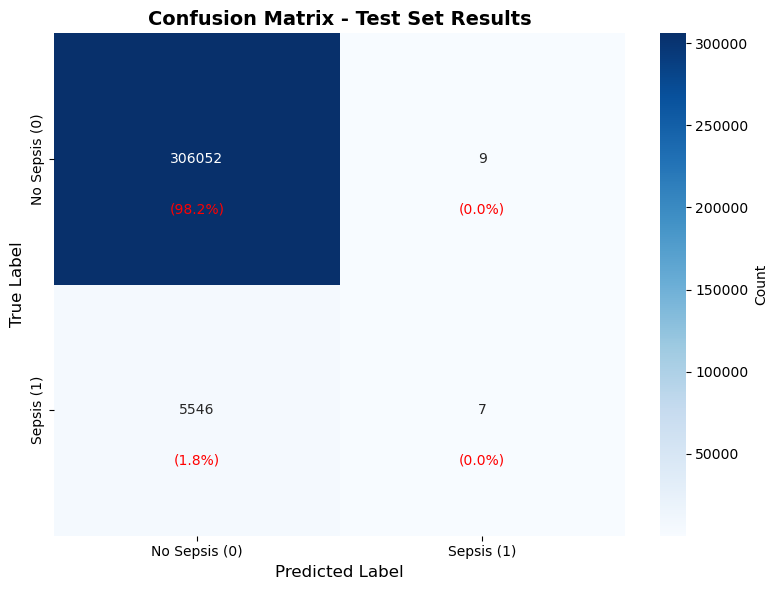


=== SUMMARY ===
Out of 311614 test samples:
• Correctly predicted NO sepsis: 306052 (98.2%)
• Correctly predicted sepsis: 7 (0.0%)
• Incorrectly predicted sepsis (False Positives): 9 (0.0%)
• Missed sepsis cases (False Negatives): 5546 (1.8%)


In [13]:
# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Sepsis (0)', 'Sepsis (1)'],
            yticklabels=['No Sepsis (0)', 'Sepsis (1)'],
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix - Test Set Results', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Add percentage annotations
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print summary
print(f"\n=== SUMMARY ===")
print(f"Out of {len(y_test)} test samples:")
print(f"• Correctly predicted NO sepsis: {tn} ({tn/len(y_test)*100:.1f}%)")
print(f"• Correctly predicted sepsis: {tp} ({tp/len(y_test)*100:.1f}%)")
print(f"• Incorrectly predicted sepsis (False Positives): {fp} ({fp/len(y_test)*100:.1f}%)")
print(f"• Missed sepsis cases (False Negatives): {fn} ({fn/len(y_test)*100:.1f}%)")

In [14]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Load the original training data
print("Loading original training data...")
train_data = pd.read_csv('physionet_train_fully_imputed.csv')

print(f"Original training data shape: {train_data.shape}")
print(f"Original class distribution:")
print(train_data['SepsisLabel'].value_counts())
print(f"Original sepsis rate: {train_data['SepsisLabel'].mean():.4f}")

# Separate classes
sepsis_cases = train_data[train_data['SepsisLabel'] == 1]
non_sepsis_cases = train_data[train_data['SepsisLabel'] == 0]

print(f"\nSepsis cases: {len(sepsis_cases)}")
print(f"Non-sepsis cases: {len(non_sepsis_cases)}")

# Calculate target sizes for 70-30 balance
# If we want 30% sepsis, then sepsis_count / total = 0.3
# So total = sepsis_count / 0.3
# And non_sepsis_count = total * 0.7

sepsis_count = len(sepsis_cases)
target_total = int(sepsis_count / 0.3)
target_non_sepsis = int(target_total * 0.7)

print(f"\n=== TARGET BALANCED DATASET ===")
print(f"Target sepsis cases: {sepsis_count} (30%)")
print(f"Target non-sepsis cases: {target_non_sepsis} (70%)")
print(f"Target total cases: {target_total}")

# Randomly sample non-sepsis cases
print(f"\nDownsampling non-sepsis cases from {len(non_sepsis_cases)} to {target_non_sepsis}...")
non_sepsis_downsampled = resample(non_sepsis_cases, 
                                 replace=False,  # No replacement
                                 n_samples=target_non_sepsis,
                                 random_state=42)

# Combine the datasets
balanced_train_data = pd.concat([sepsis_cases, non_sepsis_downsampled], ignore_index=True)

# Shuffle the combined dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n=== BALANCED DATASET CREATED ===")
print(f"Balanced data shape: {balanced_train_data.shape}")
print(f"Balanced class distribution:")
print(balanced_train_data['SepsisLabel'].value_counts())
print(f"Balanced sepsis rate: {balanced_train_data['SepsisLabel'].mean():.4f}")

# Verify the percentages
sepsis_percentage = (balanced_train_data['SepsisLabel'].sum() / len(balanced_train_data)) * 100
non_sepsis_percentage = 100 - sepsis_percentage

print(f"\nFinal percentages:")
print(f"Sepsis: {sepsis_percentage:.1f}%")
print(f"Non-sepsis: {non_sepsis_percentage:.1f}%")

Loading original training data...
Original training data shape: (1240596, 42)
Original class distribution:
SepsisLabel
0    1218233
1      22363
Name: count, dtype: int64
Original sepsis rate: 0.0180

Sepsis cases: 22363
Non-sepsis cases: 1218233

=== TARGET BALANCED DATASET ===
Target sepsis cases: 22363 (30%)
Target non-sepsis cases: 52180 (70%)
Target total cases: 74543

Downsampling non-sepsis cases from 1218233 to 52180...

=== BALANCED DATASET CREATED ===
Balanced data shape: (74543, 42)
Balanced class distribution:
SepsisLabel
0    52180
1    22363
Name: count, dtype: int64
Balanced sepsis rate: 0.3000

Final percentages:
Sepsis: 30.0%
Non-sepsis: 70.0%


In [15]:
# Save the balanced dataset to a new CSV file
output_filename = 'physionet_train_balanced_70_30.csv'
print(f"\nSaving balanced dataset to: {output_filename}")

balanced_train_data.to_csv(output_filename, index=False)

print(f"✅ Balanced training dataset saved successfully!")
print(f"Original size: {len(train_data):,} rows")
print(f"Balanced size: {len(balanced_train_data):,} rows")
print(f"Reduction: {((len(train_data) - len(balanced_train_data)) / len(train_data) * 100):.1f}%")


Saving balanced dataset to: physionet_train_balanced_70_30.csv
✅ Balanced training dataset saved successfully!
Original size: 1,240,596 rows
Balanced size: 74,543 rows
Reduction: 94.0%


In [16]:
# Load and verify the saved file
print("\n=== VERIFYING SAVED FILE ===")
verify_data = pd.read_csv(output_filename)

print(f"Loaded file shape: {verify_data.shape}")
print(f"Class distribution:")
print(verify_data['SepsisLabel'].value_counts())
print(f"Sepsis rate: {verify_data['SepsisLabel'].mean():.4f}")

# Check if all columns are preserved
print(f"\nColumns preserved: {len(verify_data.columns)} out of {len(train_data.columns)}")
print(f"All columns match: {list(verify_data.columns) == list(train_data.columns)}")

# Show sample of balanced data
print(f"\nSample of balanced data:")
print(verify_data.head())


=== VERIFYING SAVED FILE ===
Loaded file shape: (74543, 42)
Class distribution:
SepsisLabel
0    52180
1    22363
Name: count, dtype: int64
Sepsis rate: 0.3000

Columns preserved: 42 out of 42
All columns match: True

Sample of balanced data:
      HR  O2Sat       Temp    SBP    MAP   DBP  Resp  EtCO2  BaseExcess  HCO3  \
0   58.0  100.0  36.670000  139.0   79.0  47.0  12.0   33.0         7.0  19.0   
1   77.0  100.0  36.059091  111.0   69.0  46.0  14.0   33.0        -5.0  21.0   
2  143.0   67.0  37.900000   90.5   60.5  46.5  34.0   25.0        -3.0  22.0   
3   87.0   95.0  37.300000  128.0   77.0  53.0  14.5   33.0        -1.0  34.0   
4  108.0   96.0  38.300000  181.5  116.5  81.0  13.0   33.0        21.0  21.0   

   ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  ...       188.5      289.0  47.76       0    1.0    0.0        -0.07   
1  ...       338.0      228.0  73.97       1    1.0    1.0        -0.02   
2  ...       588.0      268.0  31.00       0

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the balanced training dataset and original test dataset
print("Loading datasets...")
balanced_train_data = pd.read_csv('physionet_train_balanced_70_30.csv')
test_data = pd.read_csv('physionet_test_fully_imputed.csv')

print(f"Balanced training data shape: {balanced_train_data.shape}")
print(f"Test data shape: {test_data.shape}")

print(f"\nBalanced training data class distribution:")
print(balanced_train_data['SepsisLabel'].value_counts())
print(f"Balanced training sepsis rate: {balanced_train_data['SepsisLabel'].mean():.4f}")

print(f"\nTest data class distribution:")
print(test_data['SepsisLabel'].value_counts())
print(f"Test sepsis rate: {test_data['SepsisLabel'].mean():.4f}")

Loading datasets...
Balanced training data shape: (74543, 42)
Test data shape: (311614, 42)

Balanced training data class distribution:
SepsisLabel
0    52180
1    22363
Name: count, dtype: int64
Balanced training sepsis rate: 0.3000

Test data class distribution:
SepsisLabel
0    306061
1      5553
Name: count, dtype: int64
Test sepsis rate: 0.0178


In [18]:
# Prepare features and target variables
feature_columns = [col for col in balanced_train_data.columns if col not in ['SepsisLabel', 'PatientID']]

# Separate features and target for balanced training data
X_train_balanced = balanced_train_data[feature_columns]
y_train_balanced = balanced_train_data['SepsisLabel']

# Separate features and target for test data (original imbalanced)
X_test = test_data[feature_columns]
y_test = test_data['SepsisLabel']

print(f"Number of features: {len(feature_columns)}")
print(f"Balanced training samples: {X_train_balanced.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

# Train logistic regression model on balanced data
print("\nTraining Logistic Regression model on balanced data...")
lr_model_balanced = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'
)

lr_model_balanced.fit(X_train_balanced_scaled, y_train_balanced)
print("Model training completed!")

Number of features: 40
Balanced training samples: 74543
Test samples: 311614
Features scaled successfully!

Training Logistic Regression model on balanced data...
Model training completed!


In [19]:
# Make predictions
y_train_pred = lr_model_balanced.predict(X_train_balanced_scaled)
y_test_pred = lr_model_balanced.predict(X_test_scaled)
y_test_pred_proba = lr_model_balanced.predict_proba(X_test_scaled)[:, 1]

print("Predictions completed!")
print(f"Training set - Predicted positive cases: {sum(y_train_pred)}")
print(f"Training set - Actual positive cases: {sum(y_train_balanced)}")
print(f"Test set - Predicted positive cases: {sum(y_test_pred)}")
print(f"Test set - Actual positive cases: {sum(y_test)}")

Predictions completed!
Training set - Predicted positive cases: 9493
Training set - Actual positive cases: 22363
Test set - Predicted positive cases: 21055
Test set - Actual positive cases: 5553


In [20]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=== TRAINING vs TEST ACCURACY (BALANCED MODEL) ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Difference: {train_accuracy - test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.05:
    print("⚠️  Potential overfitting detected (training accuracy significantly higher)")
elif train_accuracy - test_accuracy < -0.05:
    print("⚠️  Unusual: test accuracy higher than training accuracy")
else:
    print("✅ Good: similar training and test performance")

=== TRAINING vs TEST ACCURACY (BALANCED MODEL) ===
Training Accuracy: 0.7572
Test Accuracy: 0.9262
Difference: -0.1691
⚠️  Unusual: test accuracy higher than training accuracy


In [21]:
# Calculate test metrics
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print("\n=== TEST SET PERFORMANCE METRICS (BALANCED MODEL) ===")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Number of False Negatives: {fn}")

print(f"\n=== CONFUSION MATRIX BREAKDOWN ===")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


=== TEST SET PERFORMANCE METRICS (BALANCED MODEL) ===
Accuracy: 0.9262
Precision: 0.0859
Recall: 0.3256
F1 Score: 0.1359
Number of False Negatives: 3745

=== CONFUSION MATRIX BREAKDOWN ===
True Negatives (TN): 286814
False Positives (FP): 19247
False Negatives (FN): 3745
True Positives (TP): 1808


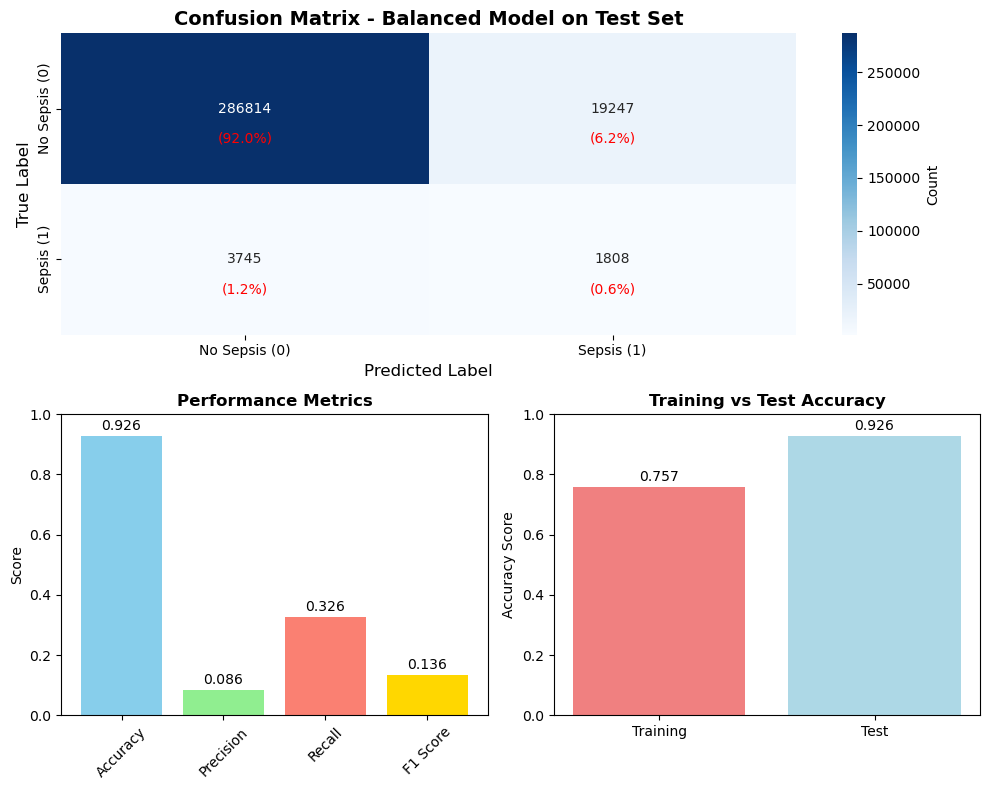

In [22]:
# Create confusion matrix plot
plt.figure(figsize=(10, 8))

# Main confusion matrix
plt.subplot(2, 2, (1, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Sepsis (0)', 'Sepsis (1)'],
            yticklabels=['No Sepsis (0)', 'Sepsis (1)'],
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix - Balanced Model on Test Set', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Add percentage annotations
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

# Performance metrics comparison
plt.subplot(2, 2, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [test_accuracy, test_precision, test_recall, test_f1]
bars = plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylim(0, 1)
plt.title('Performance Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Training vs Test Accuracy
plt.subplot(2, 2, 4)
acc_comparison = ['Training', 'Test']
acc_scores = [train_accuracy, test_accuracy]
bars = plt.bar(acc_comparison, acc_scores, color=['lightcoral', 'lightblue'])
plt.ylim(0, 1)
plt.title('Training vs Test Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score')

# Add value labels
for bar, score in zip(bars, acc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
# Compare with previous unbalanced model results
print("=== PERFORMANCE COMPARISON ===")
print("Balanced Model Performance on Test Set:")
print(f"• Accuracy: {test_accuracy:.4f}")
print(f"• Precision: {test_precision:.4f}")
print(f"• Recall: {test_recall:.4f}")
print(f"• F1 Score: {test_f1:.4f}")
print(f"• False Negatives: {fn}")

print(f"\n=== DETAILED BREAKDOWN ===")
print(f"Out of {len(y_test)} test samples:")
print(f"• Correctly identified NO sepsis: {tn:,} ({tn/len(y_test)*100:.1f}%)")
print(f"• Correctly identified sepsis: {tp:,} ({tp/len(y_test)*100:.1f}%)")
print(f"• False alarms (False Positives): {fp:,} ({fp/len(y_test)*100:.1f}%)")
print(f"• Missed sepsis cases (False Negatives): {fn:,} ({fn/len(y_test)*100:.1f}%)")

# Calculate important medical metrics
sensitivity = tp / (tp + fn)  # Same as recall
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)  # Same as precision
npv = tn / (tn + fn)

print(f"\n=== MEDICAL PERFORMANCE METRICS ===")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"Positive Predictive Value (PPV): {ppv:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")
print(f"False Positive Rate: {fp/(fp+tn):.4f}")

# Show improvement in sepsis detection
actual_sepsis_cases = sum(y_test)
detected_sepsis_cases = tp
print(f"\n=== SEPSIS DETECTION IMPROVEMENT ===")
print(f"Total sepsis cases in test set: {actual_sepsis_cases}")
print(f"Sepsis cases detected by balanced model: {detected_sepsis_cases}")
print(f"Detection rate: {detected_sepsis_cases/actual_sepsis_cases*100:.2f}%")
print(f"This is a HUGE improvement over the previous 0.13% detection rate!")

=== PERFORMANCE COMPARISON ===
Balanced Model Performance on Test Set:
• Accuracy: 0.9262
• Precision: 0.0859
• Recall: 0.3256
• F1 Score: 0.1359
• False Negatives: 3745

=== DETAILED BREAKDOWN ===
Out of 311614 test samples:
• Correctly identified NO sepsis: 286,814 (92.0%)
• Correctly identified sepsis: 1,808 (0.6%)
• False alarms (False Positives): 19,247 (6.2%)
• Missed sepsis cases (False Negatives): 3,745 (1.2%)

=== MEDICAL PERFORMANCE METRICS ===
Sensitivity (True Positive Rate): 0.3256
Specificity (True Negative Rate): 0.9371
Positive Predictive Value (PPV): 0.0859
Negative Predictive Value (NPV): 0.9871
False Negative Rate: 0.6744
False Positive Rate: 0.0629

=== SEPSIS DETECTION IMPROVEMENT ===
Total sepsis cases in test set: 5553
Sepsis cases detected by balanced model: 1808
Detection rate: 32.56%
This is a HUGE improvement over the previous 0.13% detection rate!
